# Deep Learning for Handwritten Digits

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

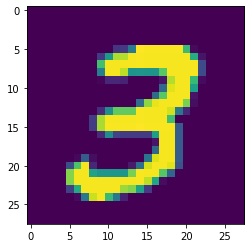

In [4]:
plt.imshow(train_images[7,:,:])

In [5]:
train_labels[7]

3

In [6]:
train_images[7,6,10]

139

In [7]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [8]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

In [9]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy',
                metrics=['accuracy'])

In [10]:
train_images_flat = train_images.reshape((60000, 28*28))
test_images_flat = test_images.reshape((10000, 28*28))

In [11]:
train_images_flat.shape

(60000, 784)

In [12]:
train_images_norm = train_images_flat.astype('float32') / 255
test_images_norm = test_images_flat.astype('float32') / 255

In [13]:
train_labels[0]

5

In [14]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [15]:
train_labels.shape

(60000, 10)

In [16]:
train_labels[0,:]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [17]:
network.fit(train_images_norm, train_labels, epochs = 5, batch_size=128)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 133us/sample - loss: 0.2572 - accuracy: 0.9254
Epoch 2/5
60000/60000 [==============================] - 6s 98us/sample - loss: 0.1022 - accuracy: 0.9696
Epoch 3/5
60000/60000 [==============================] - 7s 115us/sample - loss: 0.0675 - accuracy: 0.9800
Epoch 4/5
60000/60000 [==============================] - 7s 110us/sample - loss: 0.0499 - accuracy: 0.9850
Epoch 5/5
60000/60000 [==============================] - 7s 123us/sample - loss: 0.0373 - accuracy: 0.9887


In [18]:
predictions = network.predict(test_images_norm)

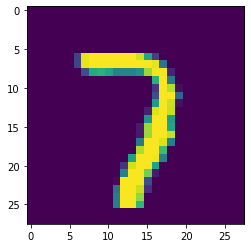

In [19]:
plt.imshow(test_images[756,:,:])

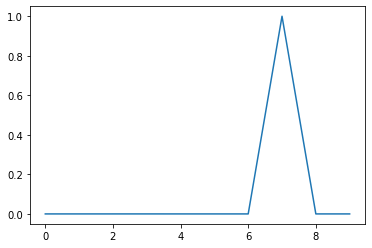

In [20]:
plt.plot(predictions[756])

In [21]:
test_loss, test_acc = network.evaluate(test_images_norm, test_labels)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [22]:
test_acc

0.9803

In [23]:
test_labels.shape

(10000, 10)

In [35]:
from sklearn.metrics import confusion_matrix
import numpy as np

confusion = confusion_matrix(np.argmax(test_labels,axis=1), np.argmax(predictions,axis=1))
print(confusion)

[[ 969    0    1    1    1    1    3    0    2    2]
 [   0 1130    1    1    0    1    2    0    0    0]
 [   5    3 1009    2    1    0    2    5    5    0]
 [   0    0    1  993    0    6    0    3    2    5]
 [   0    0    3    0  968    0    3    2    0    6]
 [   2    0    0    5    1  881    2    0    0    1]
 [   2    2    1    1    4    4  943    0    1    0]
 [   1    5    9    4    0    0    0  994    2   13]
 [   2    1    5    9    6   10    2    2  929    8]
 [   2    3    0    4   10    2    0    1    0  987]]


Acutal 1, Predicted 8 => 1
